<a href="https://colab.research.google.com/github/kittytiefenthal/cap-comp215/blob/main/examples/week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cellular Automata
This is our week 5 examples notebook and will be available on Github from the powderflask/cap-comp215 repository.

As usual, the first code block just imports the modules we will use.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Zero-dimensional CA
Here's a simple implementation of the 0-D CA mentioned in the book.
This CA is a single scalar value and a rule for computing its state-transition in the next time step.
The rule we use below is:  add 1 to previous state and take remainder of division by 2
We can express this rule concisely as:  $ state[t+1] = (state[t] + 1)\mod2 $

In [3]:
ca_state = 0  # initial state for the CA
rule = lambda state: (state + 1) % 2   # the "rule" for computing the CA state in next timestep.

# Run a simulation of the CA with given rule
n_steps = 10                              # number of time steps to run the CA simulation
ca_timesteps = [ca_state,] + [0]*n_steps  # create an "empty" state for each time step
for t in range(n_steps):
    ca_timesteps[t+1] = rule(ca_timesteps[t])
ca_timesteps

[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]

What is this CA's behaviour?   **It "blinks"!**

Notice how we are using a 1-D list to capture the state of the CA over time, making it easy to visualize the behaviour arising from its rule.
Thus, the value of `timesteps[t]` is the state of the CA at time `t`.

## One-dimensional CA
The state of a 1-D CA is represented as a vector (a list of numbers).  Each value in the CA is called a **cell**.
As in the 0-D case, a rule defines the CA behaviour over time:  $ ca[t+1] = f( ca[t] ) $

**Remember**: a 1-D CA is a **vector** representing the **state** of the CA, and a **rule** defining the **state transition** to the next timestep.

In the following example, the rule is:  sum up immediate neighbours and take mod 2

In [4]:
ca_state = [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]   # initial state for a 1-D CA
rule = lambda neighbours: sum(neighbours) % 2   # the "rule" for transition to next state for one cell in the CA.

def step(state):
    """ Return next state for given CA state after one time step """
    next = [0]*len(state)  # an "empty" list to hold the next state
    for i in range(1, len(state)-1):
        neighbours = state[i-1:i+2]
        next[i] = rule(neighbours)
    return next

# Run a simulation of the CA with given rule
n_steps = 5
ca_timesteps = [ca_state,] + [[]]*n_steps  # Create a "stack" - one state vector for each time step!
for t in range(n_steps):
    ca_timesteps[t+1] = step(ca_timesteps[t])

ca_timesteps

[[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0],
 [0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0],
 [0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0],
 [0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0]]

## numpy.array
`numpy.array` is an n-dimensional numeric object with efficient matrix operations built-in.
We can create an `array` of zeros by supplying a tuple with its dimensions, and it's data type (`dtype`):

In [5]:
rows = 5
cols = 11
array = np.zeros((rows, cols), dtype=np.uint8)
print(f'numpy.array has type: {type(array)} and dimensions {array.shape}')
array

numpy.array has type: <class 'numpy.ndarray'> and dimensions (5, 11)


array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=uint8)

### 1-D CA using a numpy.array
Here is the same example CA above coded using a `numpy.array`.
We "vertically stack" the intial CA state onto an array of timesteps (just zeros to start).
Notice the first array dimension (rows) gives the number of timesteps in our simulation, and the second dimension (cols) is the size of the CA.

In [6]:
ca_state = np.array((0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0))   # initial state for a 1-D CA

n_steps = 5
ca_timesteps = np.vstack([ca_state, np.zeros((n_steps, len(ca_state)), dtype=np.uint8)])

rule = lambda neighbours: sum(neighbours) % 2   # same "rule" for computing next state for one cell in the CA.

def step(state):
    """ Return next state for given CA state after one time step """
    next = np.zeros_like(state)
    for i in range(1, len(state)-1):
        next[i] = rule(state[i-1:i+2])
    return next

# Run a simulation of the CA with given rule
for t in range(n_steps):
    ca_timesteps[t+1] = step(ca_timesteps[t])
ca_timesteps

array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0],
       [0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0],
       [0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0],
       [0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0]])

## Visualizing the CA simulation
A table of numbers makes it hard to visualize the CA behaviour.
`pyplot` to the rescue!
An image is just a rectangular grid of numbers, so any 2D matrix can be visualized as an image...

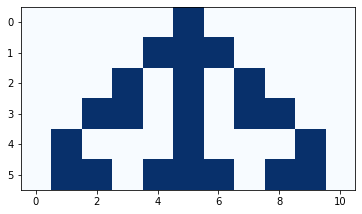

In [7]:
plt.imshow(ca_timesteps, cmap='Blues', interpolation='none')

As usual, let's create a small abstraction to hide some of the details...

In [8]:
def plot_ca(array, title=''):
    """ Plot the 2D CA state-over-time array as an image.  1's will be dark blue, 0's will be light blue. """
    plt.title(title)
    plt.xticks([])            # turn off x-axis tick marks
    plt.ylabel('Time Steps')  # label y-axis to remind us time runs from top to bottom
    plt.imshow(array, cmap='Blues', interpolation='none')

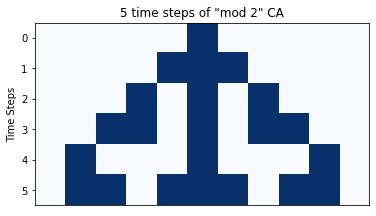

In [9]:
plot_ca(ca_timesteps, title=f'{n_steps} time steps of "mod 2" CA')

# Efficient Representations for Elementary Cellular Automata

For all **Elementary CA**, the rule has the form:   $ ca[i]_{t+1} = f(ca[i-1..i+1]_t) $
In words: the next state for cell i is a function of immediate 3-cell neighbourhood.

## Counting: how many unique states for a 3-cell neighbourhood?
Wolfram's elementary CA's use a 3-cell neighbourhood, where each cell is "on" or "off".
How many possible unique neighbourhood states are there?

In [10]:
size_of_neighbourhood = 3            # for Wolfram's set of simple CA's
n_states_for_one_cell = 2            # on or off
n_neighbourhood_states = n_states_for_one_cell ** size_of_neighbourhood    # 2**3 == 8

print(f'Number of unique neighbourhood states for {n_states_for_one_cell} state CA with neighbourhood size {size_of_neighbourhood}: {n_neighbourhood_states}')

bit = (0,1)
all_possible_neighbourhood_states = [(i,j,k) for i in bit for j in bit for k in bit]
all_possible_neighbourhood_states

Number of unique neighbourhood states for 2 state CA with neighbourhood size 3: 8


[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [24]:
'''In Class Exercise'''

#enumerate
a = ['a','b','c']
b = [1,2,3]
list(zip(a,b))  

list(enumerate(a)) #ties a to its index


[(0, 'a'), (1, 'b'), (2, 'c')]

## Binary to Decimal
A sequence of 3 zero's and one's can be interpreted as a binary number in the range [0..7]
We can easily convert a sequence of N bits like this to its decimal equivalent:
$ decimal = \sum_{i=0}^{N-1} bit_{i} \cdot 2^i $

In [11]:
bin = (1, 1 , 0)
# enumerate the digits in reverse order so low-order 'bit' is paried with exponent 0
n = sum(bit*2**i for i,bit in enumerate(reversed(bin)))
print(f"Binary {''.join(str(b) for b in bin)} == {n} Decimal")

Binary 110 == 6 Decimal


as usual, let's create a little abstraction around our initial binary-to-decimal algorithm up so we can test and re-use it...

In [12]:
def bin_to_dec1(bin):
    """ Convert sequence of binary digits to decimal number.  bin[0] is high-order bit. """
    return sum(bit*2**i for i,bit in enumerate(reversed(bin)))

assert bin_to_dec1((1, 1, 0)) == 6

## Representing a 'rule' using a lookup table (map)
An simple and efficient way to represent a "rule" for elementary CA is as a lookup table of the 8 possible transitions or "next" states.

In [13]:
mod_2_rule = (0, 1, 0, 1, 0, 1, 0, 1)
neighbourhood = (0, 1, 0)
index = bin_to_dec1(neighbourhood)
next_state = mod_2_rule[index]
f'next_state for centre cell in {neighbourhood} is {next_state}'

'next_state for centre cell in (0, 1, 0) is 0'

### How does it work?
* encode the rule as list with 8 values, each the next centre cell state for one of the 8 possible neighbourhood states.
* interpret a 3-bit neighbourhood for a cell as a binary integer: [0..7]
* use this as an **index** to look up the correct transition (next cell value) from the rule.

In [14]:
bin_21 = (0,0,0,1,0,1,0,1)     # binary encoding for 21
rule_21 =  bin_21[::-1]        # reversed (again, so low-order rule is at index 0)

neighbourhood = (1,0,1)        # just an example - try diffrent neighbourhood configurations to see how "rule 21" works
index = bin_to_dec1(neighbourhood)
next_state = rule_21[index]

print("Rule 21:", rule_21)
f'next state for {neighbourhood}, encoded at index {index}, is: {next_state}'

Rule 21: (1, 0, 1, 0, 1, 0, 0, 0)


'next state for (1, 0, 1), encoded at index 5, is: 0'

## More Counting: how many rules?
If a rule can be encoded with 8 "bits", then how many unique rules are there?

In [15]:
n_rules = n_states_for_one_cell ** n_neighbourhood_states
print(f'Number of rules for {n_states_for_one_cell} state CA with neighbourhood size {size_of_neighbourhood}: {n_rules}')

rules = [(b0,b1,b2,b3,b4,b5,b6,b7)
            for b0 in bit for b1 in bit for b2 in bit for b3 in bit for b4 in bit for b5 in bit for b6 in bit for b7 in bit
        ]
rules[:10]

Number of rules for 2 state CA with neighbourhood size 3: 256


[(0, 0, 0, 0, 0, 0, 0, 0),
 (0, 0, 0, 0, 0, 0, 0, 1),
 (0, 0, 0, 0, 0, 0, 1, 0),
 (0, 0, 0, 0, 0, 0, 1, 1),
 (0, 0, 0, 0, 0, 1, 0, 0),
 (0, 0, 0, 0, 0, 1, 0, 1),
 (0, 0, 0, 0, 0, 1, 1, 0),
 (0, 0, 0, 0, 0, 1, 1, 1),
 (0, 0, 0, 0, 1, 0, 0, 0),
 (0, 0, 0, 0, 1, 0, 0, 1)]

## Naming the Elementary Cellular Automata
Each elementary CA is named for its rule.
Since there are 256 possible rules, these CA's are named **0** thru **255**
The first 10 rules are show above.  To get their names, we need only convert the rule to decimal:

In [16]:
rule_names = [bin_to_dec1(rule) for rule in rules]
f"The Elementary CA's are named: {rule_names[:5]}...{rule_names[-5:]}"

"The Elementary CA's are named: [0, 1, 2, 3, 4]...[251, 252, 253, 254, 255]"

## Binary to Decimal revisited
`bin_to_dec1` is very general, but computationally expensive because it computes n-1 exponentiation operations for an n-digit binary number.
We can make this more efficient by pre-calculating the powers-of-2.
This algorithm is less general because we need to know the max. number of digits.  But if we know, for example, we are always working 3-bit binary sequences, and we may do thousands of such computations, this efficiency gain is worthwhile.

In [17]:
POWERS_OF_2 = np.array( (2**2, 2**1, 2**0) )  # take care of reverse ordering here!

def bin_to_dec2(bin):
    """ convert 3-digit binary sequence to decimal using pre-computed powers-of-two """
    assert len(bin) == len(POWERS_OF_2)   # this is the price we pay - we are limited to 3 bit numbers
    return sum(bin[i] * POWERS_OF_2[i] for i, digit in enumerate(bin))

assert bin_to_dec2((0,1,1)) == 3

### Dot-product algorithm
The `bin_to_dec2` algorithm sums the result of a vector multiplication:
$ decimal = \sum_{i=0}^{N-1} bit_i \cdot w_i $    where $ w_i $ repesents the $ i^{th} $ power of 2
That general algorithm is called **[dot product](https://en.wikipedia.org/wiki/Dot_product)**
([Khan Academy](https://duckduckgo.com/?q=vector+dot+product+site%3Akhanacademy.org) has some good tutorials if you want to learn more about this fundamental concept from Linear Algebra)

Let's factor out the dot-product algorithm so we can see what it looks like in general:

In [18]:
def dot_product(a, w):
    """ return the dot product of vectors a and w, to length of w """
    return sum(a[i]*w[i] for i in range(len(w)))

assert dot_product((0,1,1), (4,2,1)) == 3

def bin_to_dec3(bin):
    """ convert 3-digit binary sequence to decimal using dot-product with powers-of-two """
    assert len(bin) == len(POWERS_OF_2)
    return dot_product(bin, POWERS_OF_2)

assert bin_to_dec3((0,1,1)) == 3


### Vector Multiplication with numpy.array
`numpy.array` defines vector (and matrix) multiplication.
So, if we assume the input for `dot_product` is a `numpy.array`, the code is simplified further:

In [19]:
def dot_product(a, w):
    """ return the dot product of numpy.array a and vector w, to length of w """
    return sum(a * w)

assert dot_product(np.array([0,1,1]), [4,2,1]) == 3

def bin_to_dec(bin):
    """ convert 3-digit binary sequence to decimal using dot-product with powers-of-two """
    assert len(bin) == len(POWERS_OF_2)
    return dot_product(bin, POWERS_OF_2)

assert bin_to_dec((0,1,1)) == 3


## Sliding dot product algorithm
Now we can compute the entire vector of "rule indexes" for a CA by "sliding" the `bin_to_dec` algorithm along its vector.
This is another **sliding-window** algorithm: compute the CA rule's decimal index for each 3-cell neighbourhood in the CA
  * Note that this algorithm is generic, and so can be used to lookup transitions from any of the 256 rules!

Note: in continuous systems, like signal processing, the "sliding dot product" algorithm is called **[cross correlation](https://en.wikipedia.org/wiki/Cross-correlation)**
Thus, in `numpy` this operation is named **[correlate](https://numpy.org/doc/stable/reference/generated/numpy.correlate.html)**

In [20]:
def rule_indexes(state):
    """ Return vector of rule indexes - one index for each 3-cell neighbourhood in CA state vector. """
    indexes = [ bin_to_dec(neighbourhood) for neighbourhood in (state[i-1:i+2] for i in range(1,len(state)-1)) ]
    # "Pad"" the CA edges to mitigate edge effects
    indexes.insert(0, bin_to_dec((0, state[0], state[1])))
    indexes.append(bin_to_dec((state[-2], state[-1], 0)))
    return np.array(indexes)

assert all( rule_indexes(np.array([1,1,0,0,1,0,0,0])) == [3, 6, 4, 1, 2, 4, 0, 0] )

ca_state = np.array([1,1,0,0,1,0,0,0])
f'Indexes to choose next state for {ca_state} are: {rule_indexes(ca_state)}.'

'Indexes to choose next state for [1 1 0 0 1 0 0 0] are: [3 6 4 1 2 4 0 0].'

## Simulating an Elementary CA
 We now have the foundation to simulate ANY of Wolfram's elementary CA's with its rule defined as 8-bit look up table.
 * Tip: if the rule is an `np.array`, we could use vector indexing to index a whole row at once:  next_row=rule[indexes]
 * Tip: use `np.pad(array, n, mode='constant')` to pad array with n zeros on either end, or `mode='wrap'` to "wrap" the array ends.

In [21]:
def transition(state, rule):
    """ return a np.array for the state transition for given CA under the given 8-bit rule """
    indexes = rule_indexes(state)
    next_state = [rule[i] for i in indexes]
    return np.array(next_state)

rule_110 = (0,1,1,0,1,1,1,0)[::-1]
assert all( transition(np.array((0,0,1,1,1,0,0,0,1,1,0)), rule_110) == (0,1,1,0,1,0,0,1,1,1,0))

ca_state = np.array((0,0,1,1,1,0,0,0,1,1,0))
f'By rule 110:  {ca_state} --> {transition(ca_state, rule_110)}'

'By rule 110:  [0 0 1 1 1 0 0 0 1 1 0] --> [0 1 1 0 1 0 0 1 1 1 0]'

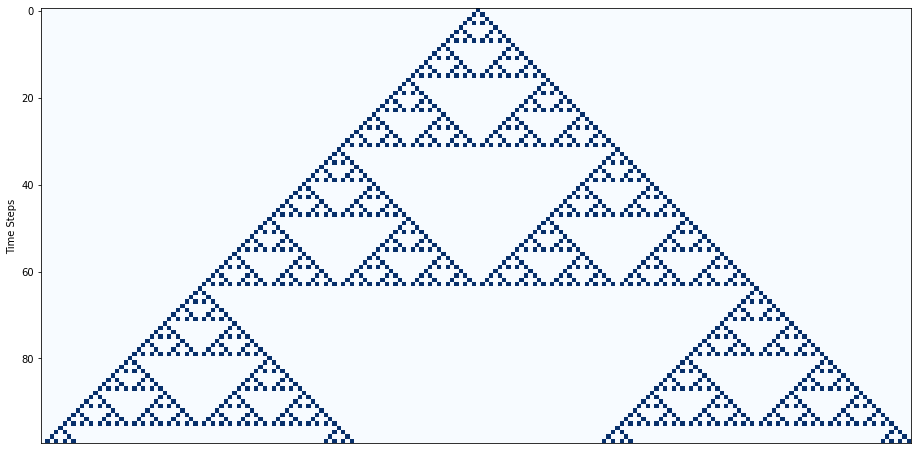

In [22]:
def simulate_ca(n_cells, n_steps, rule):
    """
    Generate "classic" Elementary CA with given number of cells,
    simulating progression of given rule for the given number of time steps.
    return a 2D array with CA state for 1 time step in each row.
    """
    array = np.zeros((n_steps, n_cells), dtype=np.uint8)  # an array of cells for each timestep
    array[0, n_cells//2] = 1                                  # place a 1 in middle of initial state
    for t in range(1, n_steps):
        array[t] = transition(array[t-1], rule)
    return array


rule_90 = [0,1,0,1,1,0,1,0][::-1]
ca_timesteps = simulate_ca(200, 100, rule_90)
plt.subplots(figsize=(16, 8))  # set the size of the plot -- experiment a bit to see what this does.
plot_ca(ca_timesteps)